In [35]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_wine
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [36]:
# Reading a CSV file into a DataFrame.
data = pd.read_csv('C:\\Users\\pabas\\Desktop\\Special Topics in Data Analytics Quiz 1\\New folder\\news.csv', encoding='ISO-8859-1')

In [37]:
# Displaying the first few rows of the DataFrame.
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary's Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...," Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [38]:
# Checking for missing values in the DataFrame.
data.isnull().sum()

Unnamed: 0    382
title         381
text            1
label           0
dtype: int64

In [39]:
# Dropping rows with missing values in the 'text' column.
data = data.dropna(subset=['text'])

In [40]:
# Dropping columns 'Unnamed: 0' and 'title' from the DataFrame.
data.drop(['Unnamed: 0', 'title'], axis=1, inplace=True)

In [41]:
# Dropping rows with missing values in the 'text' column.
data = data.dropna(subset=['text'])

In [42]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [43]:
# Checking the count of duplicate rows in the DataFrame.
data.duplicated().sum()

279

In [44]:
# Check fore duplicated data in the column 'text'
data.duplicated(subset=['text']).sum()

279

In [45]:
# Checking for duplicates in the 'text' column.
text_duplicates = data.duplicated(subset=['text']).sum()

In [46]:
# Removing duplicate rows based on the 'text' column if present.
data.drop_duplicates(subset=['text'], inplace=True)

In [47]:
# Check fore duplicated rows in the total dataset
data.duplicated().sum()

0

In [48]:
# Check fore duplicated data in the column 'text'
data.duplicated(subset=['text']).sum()

0

In [49]:
# Displaying the shape of the DataFrame (number of rows and columns).
data.shape

(6398, 2)

In [50]:
# Displaying information about the DataFrame, including data types and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6398 entries, 0 to 6676
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6398 non-null   object
 1   label   6398 non-null   object
dtypes: object(2)
memory usage: 150.0+ KB


In [51]:
# Count the number of real and fake values
value_counts = data['label'].value_counts()

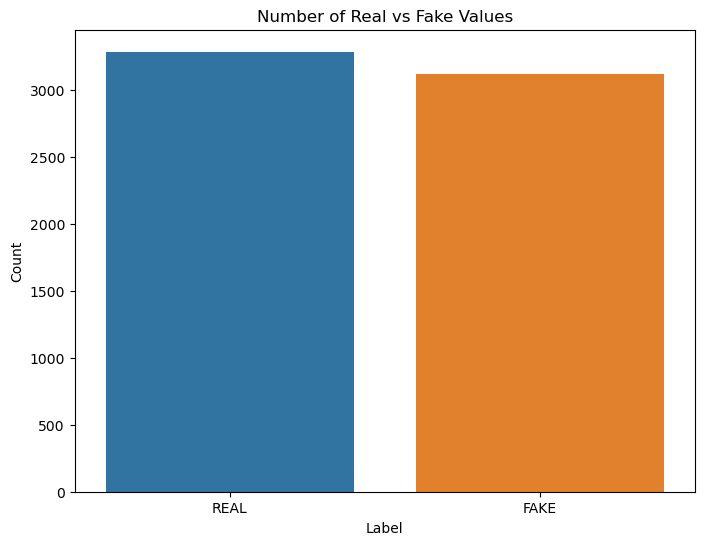

In [52]:
# Plot a bar chart to compare the counts of Real and Fake data
plt.figure(figsize=(8, 6))
sb.barplot(x=value_counts.index, y=value_counts.values)
plt.title('Number of Real vs Fake Values')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [12]:
# Importing the regular expression module.
import re

In [13]:
# Function to clean text data.
def clean_text(text):
    # Remove leading and trailing whitespaces.
    text = text.strip()                         
    # Convert text to lowercase.
    text = text.lower()                        
    # Remove non-alphanumeric characters and whitespaces.
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  
    return text

# Applying the clean_text function to the 'text' column of the DataFrame.
data['text'] = data['text'].apply(clean_text)

In [14]:
# Defining a dictionary to map labels 'FAKE' to 0 and 'REAL' to 1.
label_mapping = {'FAKE': 0, 'REAL': 1}

In [15]:
# Mapping labels in the 'label' column of the DataFrame using the defined label_mapping dictionary.
data['label'] = data['label'].map(label_mapping)

In [16]:
print(data.head())

                                                text  label
0  daniel greenfield a shillman journalism fellow...      0
1  google pinterest digg linkedin reddit stumbleu...      0
2  us secretary of state john f kerry said monday...      1
3   kaydee king kaydeeking november 9 2016 the le...      0
4  its primary day in new york and frontrunners h...      1


In [17]:
# Define x and y
x = data['text'].values
y = data['label'].values

In [18]:
#converting text data into numeric data
vect = TfidfVectorizer()
vect.fit(x)

X = vect.transform(x)

In [19]:
#split the data in to train and test
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [20]:
print(np.unique(y_train))

[0 1]


## Logistic Regression Model

In [53]:
# Creating a Logistic Regression model object.
reg1 = LogisticRegression()

In [54]:
# Fitting the Logistic Regression model to the training data.
reg1.fit(x_train,y_train)

LogisticRegression()

In [55]:
# Making predictions using the Logistic Regression model
pre1=reg1.predict(x_test)

In [56]:
# Generating the confusion matrix for Logistic Regression Model
cm1=confusion_matrix(y_test,pre1)

In [57]:
print(cm1)

[[888  68]
 [138 826]]


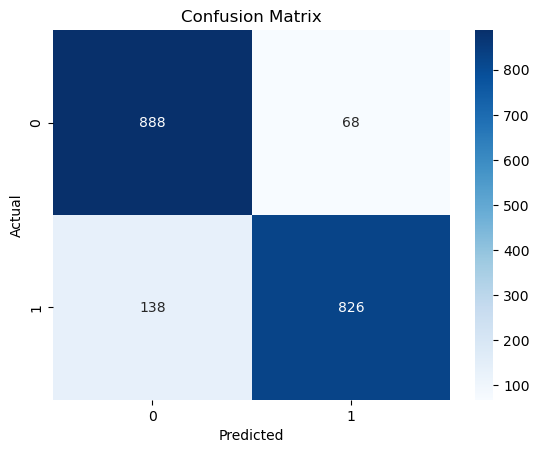

In [58]:
# Plotting the confusion matrix as a heatmap with annotations using seaborn.
sb.heatmap(cm1, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [59]:
# Calculating the accuracy score of the Logistic Regression model
score = reg1.score(x_test, y_test)
score

0.8927083333333333

## KNN

In [97]:
# Creating a K-Nearest Neighbors classifier object with k=3
knn1=KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)

In [98]:
# Fitting the K-Nearest Neighbors classifier to the training data.
knn1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [99]:
y_predict=knn1.predict(x_test)

In [100]:
# Printing the accuracy score of the K-Nearest Neighbors classifier
print(knn1.score(x_test,y_test))

0.8427083333333333


In [101]:
# Generating the confusion matrix for KNN Model
cm2=confusion_matrix(y_test,y_predict)
print(cm2)

[[787 169]
 [133 831]]


## DecisionTree

In [66]:
# Creating a Decision Tree classifier object.
tree1=DecisionTreeClassifier()

In [67]:
# Fitting the Decision Tree classifier to the training data.
tree1.fit(x_train, y_train)

DecisionTreeClassifier()

In [68]:
# Making predictions using the Decision Tree classifier
pre2=tree1.predict(x_test)

In [69]:
metrics.accuracy_score(y_test, pre2)

0.7921875

In [70]:
# Generating the confusion matrix for Decision Tree Model
cm3=confusion_matrix(y_test,y_predict)
print(cm3)

[[787 169]
 [133 831]]


## Random Forest

In [91]:
# Creating a Random Forest Regressor object with 100 estimators and random state 0.
RF1 =RandomForestRegressor(n_estimators=100,random_state=0)

In [92]:
RF1.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [93]:
# Making predictions using the Random Forest Regressor
pre4 = RF1.predict(x_test)

# Calculating the R-squared score of the Random Forest Regressor
RF1.score(x_test, y_test)

0.6018853799545132

In [94]:
# Creating a Random Forest Classifier object with maximum depth of 4 and enabling out-of-bag scoring.
RF2 = RandomForestClassifier(max_depth=4, oob_score=True)

# Fitting the Random Forest Classifier to the training data.
RF2.fit(x_train, y_train)

# Printing the accuracy score of the Random Forest Classifier on the test data.
print(RF2.score(x_test, y_test))

# Printing the out-of-bag score of the Random Forest Classifier.
print(RF2.oob_score_)

0.7677083333333333
0.7630638677981242


In [95]:
y_pred1=RF2.predict(x_test)

In [96]:
# Generating the confusion matrix for Random Forest Model
cm4=confusion_matrix(y_test,y_pred1)
print(cm4)

[[759 197]
 [249 715]]


## Bagging

In [72]:
# Creating a Bagging Classifier object with 100 estimators and random state 22.
Bag1 = BaggingClassifier(n_estimators=100, random_state=22)

In [73]:
# Fitting the Bagging Classifier to the training data.
Bag1.fit(x_train, y_train)

BaggingClassifier(n_estimators=100, random_state=22)

In [74]:
Bag1.predict(x_test)

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [75]:
Bag1.score(x_test,y_test)

0.865625

In [76]:
# Creating another Bagging Classifier object with 20 estimators and random state 22.
Bag2 = BaggingClassifier(n_estimators=20, random_state=22)

Bag2.fit(x_train, y_train)

BaggingClassifier(n_estimators=20, random_state=22)

In [77]:
# Making predictions using the Bagging Classifier
pre5=Bag2.predict(x_test)

In [78]:
# Calculating the accuracy score of the Bagging Classifier
Bag2.score(x_test,y_test)

0.8520833333333333

In [79]:
# Generating the confusion matrix for Bagging
cm5=confusion_matrix(y_test,pre5)
print(cm5)

[[825 131]
 [153 811]]



## Ada Boost


In [80]:
# Creating an AdaBoost Classifier object with 100 estimators and learning rate 0.2, and fitting it to the training data.
Ada1 = AdaBoostClassifier(n_estimators=100, learning_rate=0.2).fit(x_train, y_train)

In [81]:
# Calculating the accuracy score of the AdaBoost Classifier
score = Ada1.score(x_test, y_test)

In [82]:
pre6=Ada1.predict(x_test)

In [83]:
score

0.8807291666666667

In [84]:
# Generating the confusion matrix for Ada Boost
cm6=confusion_matrix(y_test,pre6)
print(cm6)

[[853 103]
 [126 838]]


In [90]:
# Extracting a specific news item from the test data for prediction.
Check_News = x_test[1]

# Predicting the label of the news item using the trained Logistic Regression model.
predict = reg1.predict(Check_News)

# Printing the predicted label.
print(predict)

# Checking if the predicted label is 'REAL' and printing a corresponding message.
if predict[0] == 'REAL':
    print('the news is real')
# Otherwise, printing a message indicating that the news is classified as fake.
else:
    print('the news is fake')

[0]
the news is fake
